### Detect Data Drift
**Description**: Data drift can occur when the statistical properties of your data change over time. Learn to detect data drift using visualizations.

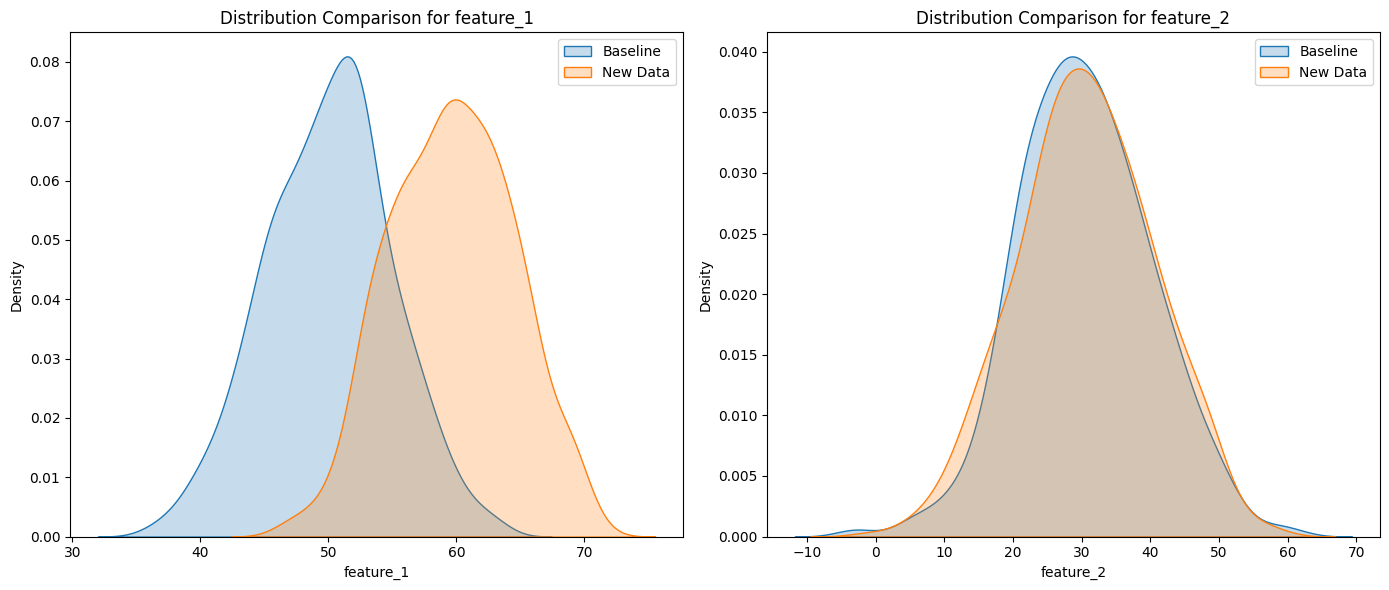

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def validate_dataframes(df1, df2, required_cols):
    """Validate input dataframes and required columns."""
    if not isinstance(df1, pd.DataFrame) or not isinstance(df2, pd.DataFrame):
        raise ValueError("Inputs must be pandas DataFrames.")
    for col in required_cols:
        if col not in df1.columns or col not in df2.columns:
            raise ValueError(f"Column '{col}' missing from one of the datasets.")

def sample_data(df, sample_size=500):
    """Sample data if larger than sample_size for performance."""
    if len(df) > sample_size:
        return df.sample(sample_size, random_state=42)
    return df

def plot_data_drift(baseline_df, new_df, features):
    """Plot KDE comparisons for data drift detection."""
    plt.figure(figsize=(14, 6))
    for i, feature in enumerate(features, 1):
        plt.subplot(1, len(features), i)
        sns.kdeplot(baseline_df[feature], label='Baseline', fill=True)
        sns.kdeplot(new_df[feature], label='New Data', fill=True)
        plt.title(f'Distribution Comparison for {feature}')
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.legend()
    plt.tight_layout()
    plt.show()

# Example Usage
np.random.seed(42)
baseline_data = pd.DataFrame({
    'feature_1': np.random.normal(loc=50, scale=5, size=10000),
    'feature_2': np.random.normal(loc=30, scale=10, size=10000)
})
new_data = pd.DataFrame({
    'feature_1': np.random.normal(loc=60, scale=5, size=10000),  # drift here
    'feature_2': np.random.normal(loc=30, scale=10, size=10000)
})

required_features = ['feature_1', 'feature_2']

try:
    validate_dataframes(baseline_data, new_data, required_features)
    baseline_sample = sample_data(baseline_data)
    new_sample = sample_data(new_data)
    plot_data_drift(baseline_sample, new_sample, required_features)
except Exception as e:
    print(f"Error: {e}")

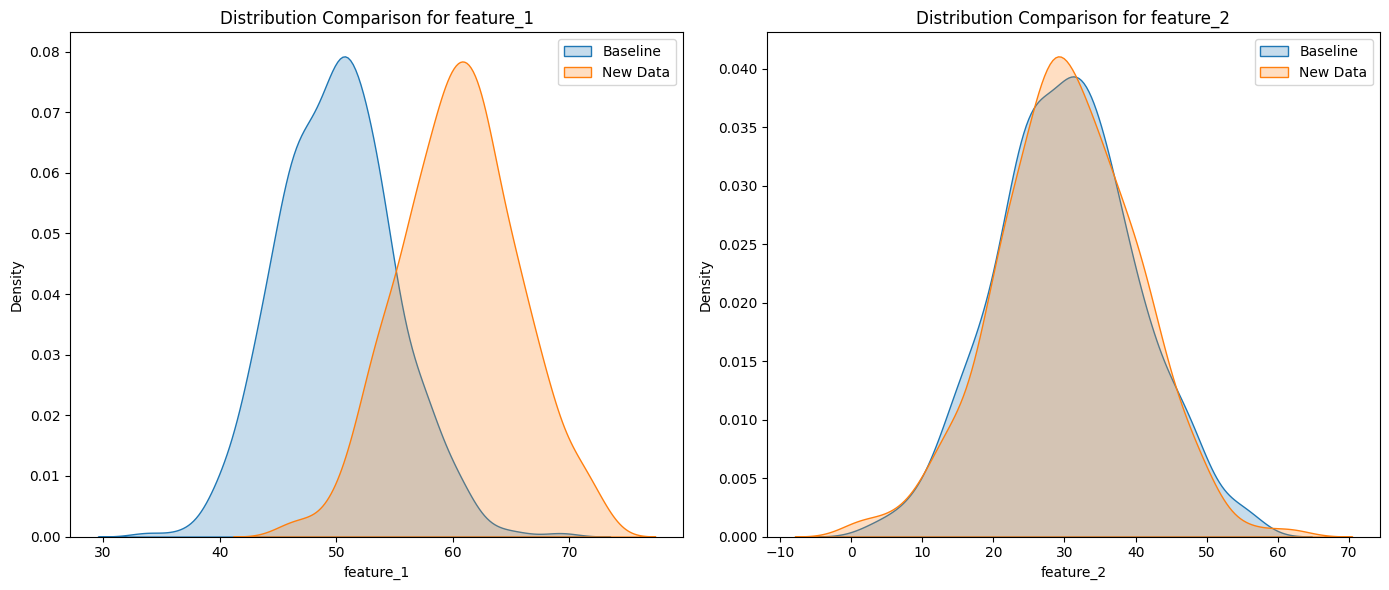

In [4]:
# Write your code from here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate original data (baseline)
np.random.seed(42)
baseline_data = pd.DataFrame({
    'feature_1': np.random.normal(loc=50, scale=5, size=500),
    'feature_2': np.random.normal(loc=30, scale=10, size=500)
})

# Simulate new data with drift (mean shift in feature_1)
new_data = pd.DataFrame({
    'feature_1': np.random.normal(loc=60, scale=5, size=500),  # mean shifted by +10
    'feature_2': np.random.normal(loc=30, scale=10, size=500)  # no drift here
})

# Plot distributions to visualize drift
plt.figure(figsize=(14,6))

for i, feature in enumerate(['feature_1', 'feature_2'], 1):
    plt.subplot(1, 2, i)
    sns.kdeplot(baseline_data[feature], label='Baseline', fill=True)
    sns.kdeplot(new_data[feature], label='New Data', fill=True)
    plt.title(f'Distribution Comparison for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()